In [1]:

from elasticsearch import Elasticsearch
es = Elasticsearch([{'host':'localhost', 'port':9200}])

C:\Users\aish2


In [4]:
from elasticsearch import Elasticsearch

from elasticsearch import helpers

import pandas as pd

import glob
import os


path = os.path.abspath("C:\SearchEngine\data\TelevisionNews")



files = glob.glob(path + "*.csv")

import csv
es = Elasticsearch([{'host':'localhost','port':9200}])
ct = 1
for file in os.listdir(path):
    
    print(ct)
    ct+=1
    
    with open(os.path.join(path, file)) as f:
        reader = csv.DictReader(f)

        try:
            helpers.bulk(es, reader, index='newi', doc_type='my-type')
        except Exception as e:
            pass
   

    

1
2
3
4


C:\Users\aish2\Anaconda3\lib\site-packages\elasticsearch\connection\base.py:190: ElasticsearchDeprecationWarning: [types removal] Specifying types in bulk requests is deprecated.
  warnings.warn(message, category=ElasticsearchDeprecationWarning)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


In [3]:
import time
import json
import pprint
pp = pprint.PrettyPrinter(indent=2)
es = Elasticsearch([{'host':'localhost','port':9200}])

In [4]:

res = es.search(index="newi", body={"query": {"match": {"Snippet": "energy saving lightbulbs"}}})
print(json.dumps(res, indent=4))


{
    "took": 37,
    "timed_out": false,
    "_shards": {
        "total": 1,
        "successful": 1,
        "skipped": 0,
        "failed": 0
    },
    "hits": {
        "total": {
            "value": 3090,
            "relation": "eq"
        },
        "max_score": 22.728579,
        "hits": [
            {
                "_index": "newi",
                "_type": "my-type",
                "_id": "4LDPy3UBIv-O9Y61YqdT",
                "_score": 22.728579,
                "_source": {
                    "\u00ef\u00bb\u00bfURL": "https://archive.org/details/CNNW_20190905_004000_Bernie_Sanders_Climate_Town_Hall#start/825/end/860",
                    "MatchDateTime": "9/5/2019 0:54:00",
                    "Station": "CNN",
                    "Show": "Bernie Sanders Climate Town Hall",
                    "IAShowID": "CNNW_20190905_004000_Bernie_Sanders_Climate_Town_Hall",
                    "IAPreviewThumb": "https://archive.org/download/CNNW_20190905_004000_Bernie_Sanders_

In [ ]:
# beena - 0.01s(elastic), 0.02s(search engine) - retrieves 1 extra doc in our search engine
# top three warmest - 0.01s, 0.11s 
# global warming - 1.58s, 12.31s
#charge of the environment committee - 0.81
#climate change

In [35]:
start = time.time()
res = es.search(index="newi", body={"query": {"match": {"Snippet": "top three warmest years on record"}}}, size = 10)
end = time.time()
final_res = res['hits']['hits']

#print(json.dumps(res, indent=4))
acc_list = []
for result in final_res:
    acc_list.append(result['_source']['Snippet'])
print(acc_list)

t = end - start
print('%.3f seconds'%t)

['one of the top three warmest years on record, making tackling climate change a priority. two years earlier, in paris, the world came to a landmark agreement to limit temperature rise.', "whatever happened to global warming? in fact, 2016, 2015 and 2017 rank as the world's three warmest years on record. now that we're on the climate, let's go to bill karins for a", "shepard: new today, global warming shows no signs of stopping. that's according to the scientists at nasa who say last year was the fourth warmest year on record behind only the previous three years. nasa released this animation that shows how temperatures", 'declare the conference (indiscernible) convention on climate change. these scientists argue our world is heating up 912 warmest years on record have occurred', "everybody that it is the warmest decade on record. it's the warmest june on record and it's very much on the way to being the warmest year on record. now, this is absolutely. this is not proof of climate chang

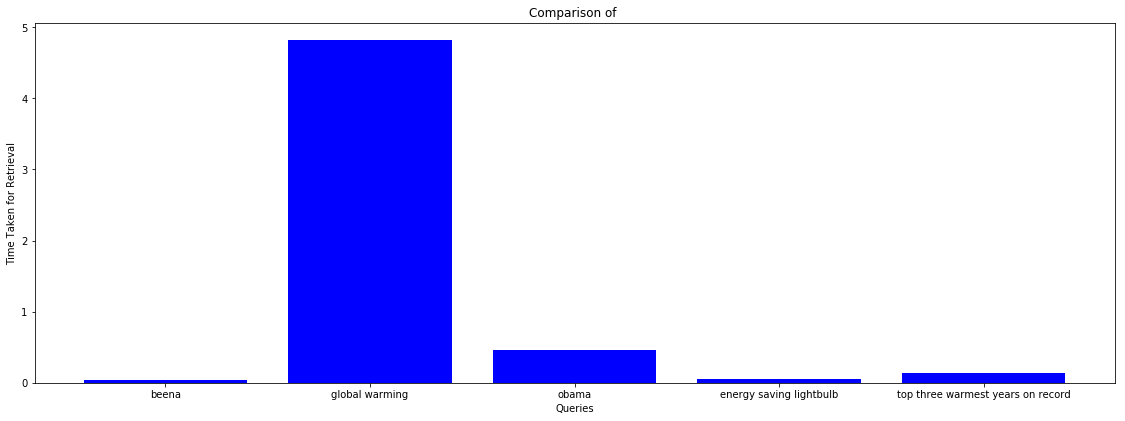